Q1. What is the mathematical formula for a linear SVM?
A linear Support Vector Machine (SVM) aims to find the optimal hyperplane that separates classes. The equation of a linear SVM hyperplane in a d-dimensional space is:

𝑤
𝑇
𝑥
+
𝑏
=
0
w
T
 x+b=0
where w is the weight vector, x is the input feature vector, and b is the bias term.

Q2. What is the objective function of a linear SVM?
The objective function for a linear SVM is:

min
⁡
𝑤
,
𝑏
1
2
∣
∣
𝑤
∣
∣
2
w,b
min
​
  
2
1
​
 ∣∣w∣∣
2

subject to the constraint:

𝑦
𝑖
(
𝑤
𝑇
𝑥
𝑖
+
𝑏
)
≥
1
,
∀
𝑖
y
i
​
 (w
T
 x
i
​
 +b)≥1,∀i
where
𝑦
𝑖
y
i
​
  are the class labels (
±
1
±1), and
𝑥
𝑖
x
i
​
  are the training samples. The objective minimizes
∣
∣
𝑤
∣
∣
2
∣∣w∣∣
2
  to maximize the margin between classes.

Q3. What is the kernel trick in SVM?
The kernel trick allows SVM to classify non-linearly separable data by mapping it to a higher-dimensional space where it becomes linearly separable. Instead of explicitly transforming the data, it uses a kernel function
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
K(x
i
​
 ,x
j
​
 ) to compute dot products in the transformed space efficiently. Common kernels include:

Linear kernel:
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
𝑥
𝑖
𝑇
𝑥
𝑗
K(x
i
​
 ,x
j
​
 )=x
i
T
​
 x
j
​

Polynomial kernel:
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
(
𝑥
𝑖
𝑇
𝑥
𝑗
+
𝑐
)
𝑑
K(x
i
​
 ,x
j
​
 )=(x
i
T
​
 x
j
​
 +c)
d

Radial Basis Function (RBF) kernel:
𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
𝑒
−
𝛾
∣
∣
𝑥
𝑖
−
𝑥
𝑗
∣
∣
2
K(x
i
​
 ,x
j
​
 )=e
−γ∣∣x
i
​
 −x
j
​
 ∣∣
2


Q4. What is the role of support vectors in SVM? Explain with an example.
Support vectors are the data points closest to the decision boundary, which define the margin of separation between classes. They are crucial because:

They determine the optimal hyperplane—removing other points does not affect the boundary.
They make SVM robust to noise and outliers, as only a few critical points influence the decision.
Example:
In a binary classification problem, suppose we have two classes (red and blue). The SVM finds the hyperplane that best separates them, and the closest red and blue points to this hyperplane are the support vectors.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin, and Hard margin in SVM.
Hyperplane – A decision boundary that separates classes in an SVM model.
Marginal plane – The parallel boundaries on either side of the hyperplane where support vectors lie.
Hard margin – When data is perfectly separable, SVM enforces no misclassification (strict margin).
Soft margin – Allows misclassified points to handle noisy and non-linearly separable data using a penalty factor
𝐶
C.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using first two features for visualization
y = iris.target

# Binary classification (Class 0 vs. others)
y = (y == 0).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)


In [3]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


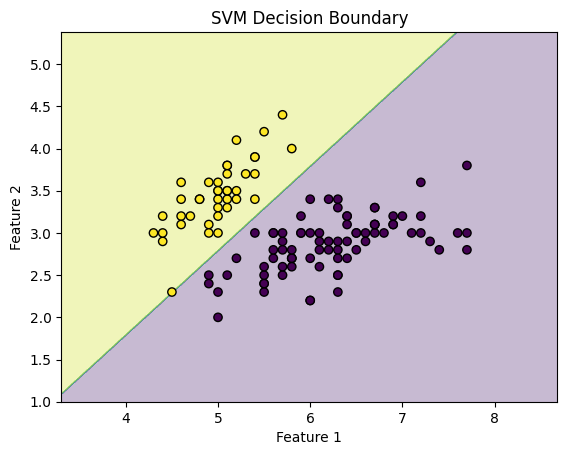

In [4]:
def plot_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(svm_model, X_train, y_train)


In [5]:
for C_val in [0.01, 0.1, 1, 10]:
    svm_model = SVC(kernel="linear", C=C_val)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C={C_val}, Accuracy: {accuracy:.2f}")


C=0.01, Accuracy: 0.67
C=0.1, Accuracy: 1.00
C=1, Accuracy: 1.00
C=10, Accuracy: 1.00


In [6]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, epochs=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert to {-1, 1}
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

# Train custom SVM
svm_custom = LinearSVM(learning_rate=0.001, lambda_param=0.01, epochs=1000)
svm_custom.fit(X_train, y_train)
y_pred_custom = svm_custom.predict(X_test)

# Compare performance
custom_accuracy = accuracy_score(y_test, y_pred_custom)
print(f"Custom SVM Accuracy: {custom_accuracy:.2f}")


Custom SVM Accuracy: 0.33
